## Analisis publicitario

### Carga de datos

In [2]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.style.use('default')
sns.set()

In [4]:
#Funciones auxiliares
def mostrar_porcentaje_barplot(ax):
    suma = 0
    for p in ax.patches:
        suma += p.get_height()
    for p in ax.patches:
        ax.annotate(str(np.round(100 *(p.get_height() / suma),decimals=2)) + "%", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def mostrar_valores_barplot(ax):
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [5]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

### Evolución de las campañas a lo largo del tiempo

[Text(0,0.5,'Porcentaje'),
 Text(0.5,0,'Semana'),
 Text(0.5,1,'Proporcion de source de 5 mayores campañas publicitarias')]

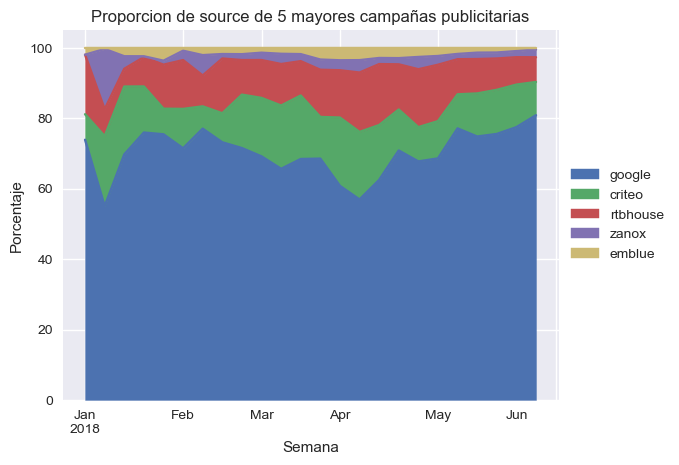

In [6]:
n = 5

hits_campanias = df.loc[(df['event']=='ad campaign hit'), ['timestamp', 'person', 'url', 'campaign_source']].copy()
hits_campanias['semana'] = hits_campanias['timestamp'].dt.week - 1
hits_campanias['semana'] = pd.to_datetime('2018', format='%Y') + pd.to_timedelta(hits_campanias['semana'].mul(7).astype('str') + ' days')
hits_campanias.dropna(subset = ['campaign_source'], inplace = True)

n_mayores_sources = hits_campanias['campaign_source'].value_counts().iloc[0:n]

hits_campanias = pd.crosstab(hits_campanias['semana'], hits_campanias['campaign_source'])
hits_campanias = hits_campanias.loc[:, n_mayores_sources.index]
hits_campanias = hits_campanias.div(hits_campanias.sum(axis=1), axis=0).multiply(100)

ax = hits_campanias.plot(kind = 'area')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set(xlabel='Semana', ylabel='Porcentaje', title = 'Proporcion de source de '+str(n)+' mayores campañas publicitarias')

### Ventas por campaña

In [7]:
ad_campaigns = df.loc[(df['event']=='ad campaign hit') | (df['event']=='conversion')]#.drop_duplicates()#[['person','campaign_source']].drop_duplicates().set_index('campaign_source')
ad_campaigns.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ad_campaigns_cool = df.loc[(df['event']=='ad campaign hit'),['person','campaign_source']].drop_duplicates()
ad_campaigns_cool.head()

,person,campaign_source
0,0004b0a2,criteo
6,0006a21a,criteo
11,000a54b2,google
99,0019c395,google
107,001bb7eb,google


In [9]:
personas_que_compraron = df.loc[df['event']=='conversion',['person']].drop_duplicates()
personas_que_compraron['compro'] = True
personas_que_compraron.head()

,person,compro
220,00204059,True
2282,00c13dee,True
2547,00fdbb4b,True
4245,0146a9df,True
6985,01db2fe6,True


In [10]:
compras_por_campania = pd.merge(ad_campaigns_cool, personas_que_compraron, on='person', how='left')
compras_por_campania.head(10)

,person,campaign_source,compro
0,0004b0a2,criteo,NaN
1,0006a21a,criteo,NaN
2,000a54b2,google,NaN
3,0019c395,google,NaN
4,001bb7eb,google,NaN
5,001f1653,criteo,NaN
6,00204059,FacebookAds,True
7,00204059,zanox,True
8,00204059,google,True
9,0024a82b,google,NaN


In [11]:
compras2 = compras_por_campania.groupby('campaign_source').agg({'person': 'count','compro':'count'})
compras2.head()

,person,compro
campaign_source,,
Facebook,44,5
FacebookAds,407,28
FacebookSocial,6,1
Google Social,1,0
MARKETING SOCIAL,1,0


Text(0,0.5,'Cantidad de hits')

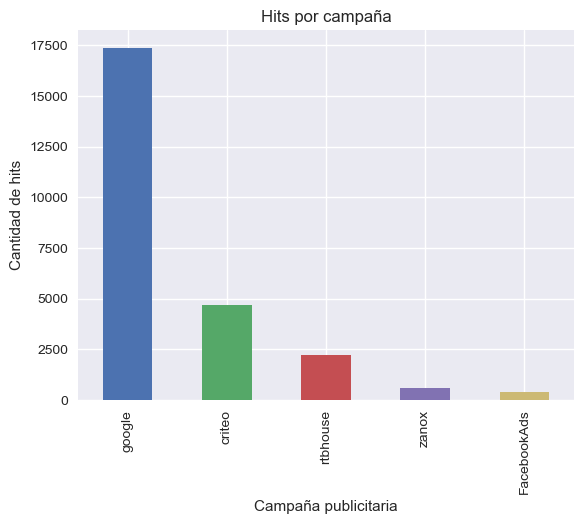

In [12]:
g = compras2['person'].sort_values(ascending=False).head().plot('bar')
g.set_title('Hits por campaña')
g.set_xlabel('Campaña publicitaria')
g.set_ylabel('Cantidad de hits')

Text(0.5,1,'Cantidad de compras realizadas por campaña')

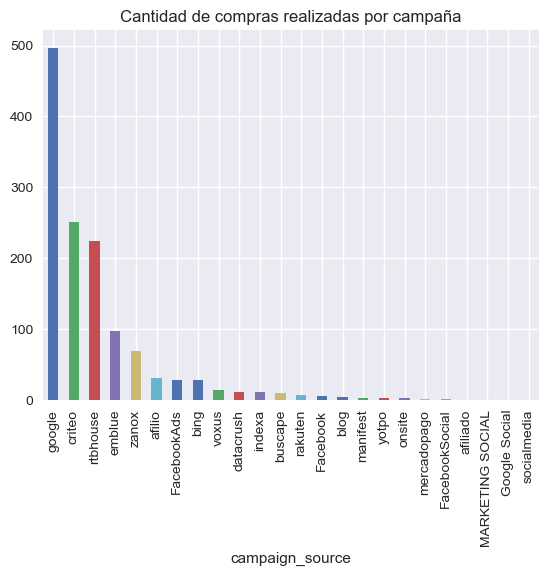

In [13]:
g2 = compras2['compro'].sort_values(ascending=False).plot('bar')
g2.set_title('Cantidad de compras realizadas por campaña')

Text(0.5,1,'Porcentaje de compras logradas por campaña publicitaria')

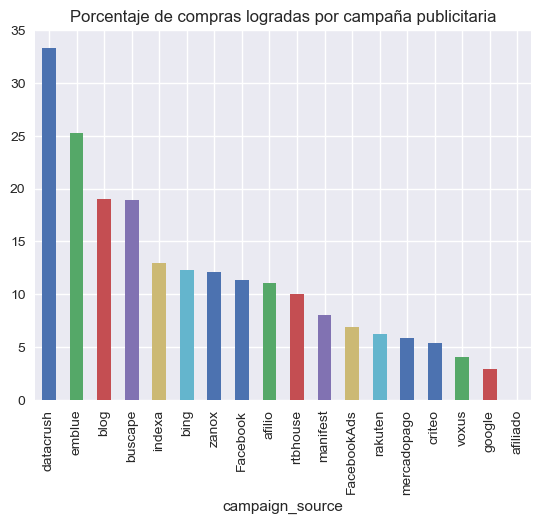

In [14]:
#QUITAMOS LOS QUE TIENEN MENOS DE 10 HITS PARA NO DEFORMAR
compras2 = compras2[compras2["person"] > 10]
compras2['porcentaje'] = 100* (compras2['compro']/compras2['person'])
g3 = compras2['porcentaje'].sort_values(ascending=False).plot('bar')
g3.set_title('Porcentaje de compras logradas por campaña publicitaria')

Hay una "campaña publicitaria" llamada onsite que debería ser eliminada del data frame